# This is a demo project to show TRAIN-TEST dataset usage.

# We are not going to focus on data cleaning, EDA or Model performance.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [3]:
train=pd.read_csv('bigdatamart_Train.csv.txt')
test=pd.read_csv('bigdatamart_Test.csv.txt')

In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
train.drop('Item_Identifier',axis=1,inplace=True)
test.drop('Item_Identifier',axis=1,inplace=True)

In [7]:
train.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
train['Item_Weight'].fillna(train['Item_Weight'].median(),inplace=True)

In [12]:
train['Outlet_Size'].fillna('Small',inplace=True)

In [13]:
train.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
missing_item_weight          0
dtype: int64

In [14]:
test.isnull().sum()

Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
missing_item_weight             0
dtype: int64

In [15]:
test['Item_Weight'].fillna(test['Item_Weight'].median(),inplace=True)
test['Outlet_Size'].fillna('Small',inplace=True)

In [16]:
test.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
missing_item_weight          0
dtype: int64

In [396]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,missing_item_weight
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914,0.171653
std,4.22724,0.051598,62.275067,8.371760,1706.499616,0.377101
min,4.55500,0.000000,31.290000,1985.000000,33.290000,0.000000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400,0.000000
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000,0.000000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400,0.000000
max,21.35000,0.328391,266.888400,2009.000000,13086.964800,1.000000


In [17]:
def fat_content(df):
    fat=[]
    for i in df['Item_Fat_Content']:
        if i in ['Regular','reg']:
            fat.append('Regular')
        else:
            fat.append('low fat')
    return fat        

In [18]:
train['fat_content']=fat_content(train)
test['fat_content']=fat_content(test)
train.drop('Item_Fat_Content',axis=1,inplace=True)
test.drop('Item_Fat_Content',axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fat_content', ylabel='count'>

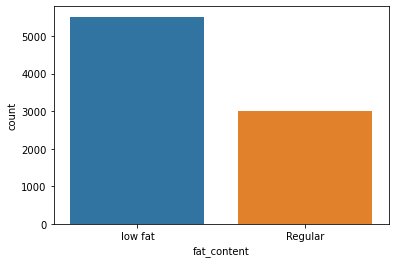

In [19]:
sns.countplot(train['fat_content'])

<AxesSubplot:xlabel='fat_content', ylabel='Item_Outlet_Sales'>

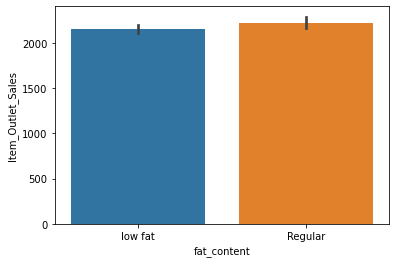

In [20]:
sns.barplot(x='fat_content',y='Item_Outlet_Sales',data=train)

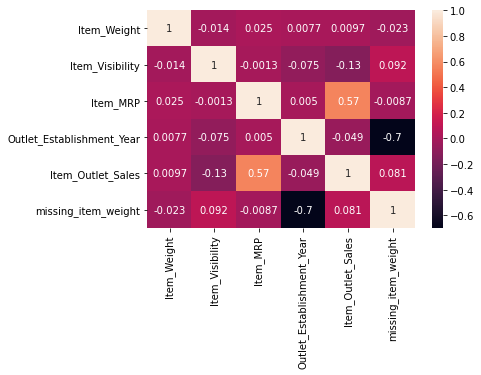

In [411]:
sns.heatmap(train.corr(),annot=True)

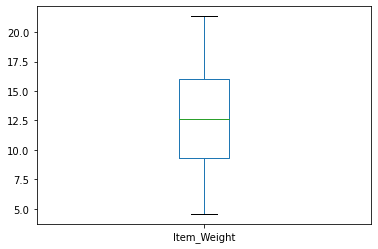

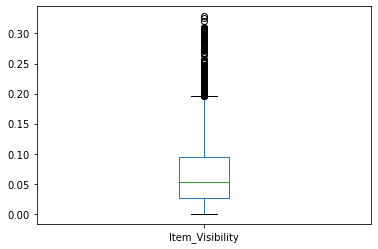

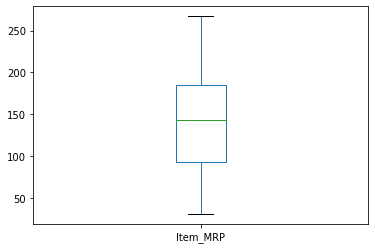

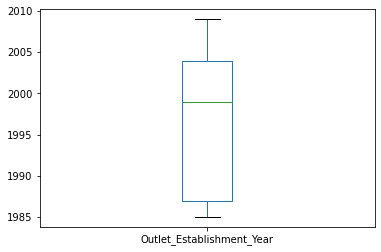

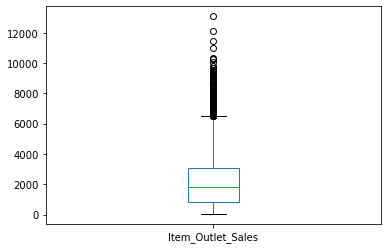

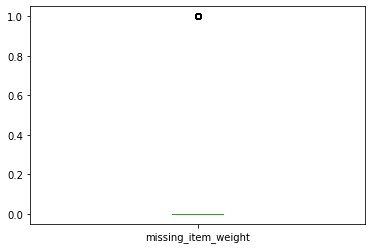

In [412]:
for col in temp.columns:
    try:
        train[col].plot.box()
        plt.show()
    except:
        continue

In [22]:
temp=pd.get_dummies(train,drop_first=True) 

In [23]:
col=list(temp.columns)

In [24]:
col.remove('Item_Outlet_Sales')

In [25]:
test=pd.get_dummies(test)[col]

In [26]:
cols = ['Item_Visibility','Item_Outlet_Sales']

Q1 = temp[cols].quantile(0.25)
Q3 = temp[cols].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
t=temp[~((temp[cols] < (Q1 - 1.5 * IQR)) |(temp[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

Item_Visibility         0.067596
Item_Outlet_Sales    2267.049000
dtype: float64


### Creating x & y from TRAIN data only 

In [27]:
x=t.drop('Item_Outlet_Sales',axis=1)
y=t['Item_Outlet_Sales']

In [28]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
x=pd.DataFrame(pt.fit_transform(x), columns = x.columns) # on TRAIN data
test=pd.DataFrame(pt.transform(test), columns = test.columns) # On TEST data

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:243: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns) # on TRAIN data
test = pd.DataFrame(scaler.fit_transform(test), columns = test.columns) # On TEST data

### Now we are using x & y to create train_test_split. Remember these x & y are created from TRAIN data only.  We will use TEST data after sving the model.

In [437]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [438]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [440]:
model.score(x_test,y_test)

0.5113362628180735

### Now you should follow all the procedures to find out your best model(cecking difference between model accuracy and corss validation score for multiple models)

### After selecting best model, apply hyper parameter tuning on your best model

### Now save your best model

In [ ]:
import joblib
joblib.dump(model,"BestModel.pkl")

### Now load the saved best model and use TEST data to get prediction

In [ ]:
Z=joblib.load("BestModel.pkl")

In [ ]:
prediction=Z.predict(x_test)

In [ ]:
prediction=pd.DataFrame(prediction) # Converting into Data frame